In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

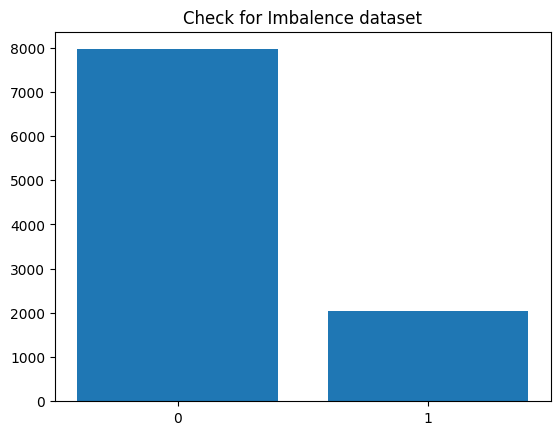

In [8]:
#Checking for imbalence dataset

x=['0','1']
y=[7963, 2037]

plt.bar(x=x ,height=y)
plt.title('Check for Imbalence dataset')
plt.show()

In [9]:
#Checking for any n/a values
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
#Checking for Duplicate values
df.duplicated().sum()

0

In [11]:
#Drop uneccessary columns
df = df.drop(['RowNumber','CustomerId', 'Surname'] , axis=1)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [12]:
#Feature selection, X, Y
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [13]:
x

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [14]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [15]:
#Feature encoding

#Gender
#LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:,2] = le.fit_transform(x[:,2])

In [16]:
x

array([[619, 'France', 0, ..., 1, 1, 101348.88],
       [608, 'Spain', 0, ..., 0, 1, 112542.58],
       [502, 'France', 0, ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 0, ..., 0, 1, 42085.58],
       [772, 'Germany', 1, ..., 1, 0, 92888.52],
       [792, 'France', 0, ..., 1, 0, 38190.78]], dtype=object)

In [17]:
#Feature Encoding

#Geography
#One Hot Encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[ ('encoder', OneHotEncoder(), [1]) ], remainder='passthrough') #It's the column index-1 which we want to encode
x = ct.fit_transform(x)

In [18]:
x

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [19]:
#Train test split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=123)

In [20]:
xtrain

array([[1.0, 0.0, 0.0, ..., 1, 1, 54265.55],
       [1.0, 0.0, 0.0, ..., 1, 0, 132741.13],
       [0.0, 0.0, 1.0, ..., 0, 0, 81483.64],
       ...,
       [1.0, 0.0, 0.0, ..., 1, 0, 38691.34],
       [1.0, 0.0, 0.0, ..., 1, 1, 165614.4],
       [1.0, 0.0, 0.0, ..., 1, 0, 8816.37]], dtype=object)

In [21]:
ytrain

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
xtest

array([[0.0, 0.0, 1.0, ..., 0, 1, 111676.63],
       [1.0, 0.0, 0.0, ..., 0, 1, 183049.41],
       [1.0, 0.0, 0.0, ..., 1, 1, 74687.37],
       ...,
       [1.0, 0.0, 0.0, ..., 1, 1, 86575.46],
       [0.0, 0.0, 1.0, ..., 1, 1, 100423.88],
       [1.0, 0.0, 0.0, ..., 1, 0, 71154.1]], dtype=object)

In [23]:
ytest

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#Note we dont have to feature scale OneHotEncoded columns
#Note on xtrain (independent training feature) we always apply .fit_transform()
#Note on xtest (independent testing feature) we always apply .transform()
xtrain[:, 3:] = sc.fit_transform(xtrain[:,3:])
xtest[:, 3:] = sc.transform(xtest[:, 3:])

In [25]:
xtrain

array([[1.0, 0.0, 0.0, ..., 0.6429833293619706, 0.9706796511674763,
        -0.7922373064027591],
       [1.0, 0.0, 0.0, ..., 0.6429833293619706, -1.0302059992679296,
        0.5702432888834361],
       [0.0, 0.0, 1.0, ..., -1.5552502752943391, -1.0302059992679296,
        -0.31968113713643154],
       ...,
       [1.0, 0.0, 0.0, ..., 0.6429833293619706, -1.0302059992679296,
        -1.0626342746304833],
       [1.0, 0.0, 0.0, ..., 0.6429833293619706, 0.9706796511674763,
        1.140983797951401],
       [1.0, 0.0, 0.0, ..., 0.6429833293619706, -1.0302059992679296,
        -1.5813187738053505]], dtype=object)

In [26]:
xtest

array([[0.0, 0.0, 1.0, ..., -1.5552502752943391, 0.9706796511674763,
        0.20452477492780738],
       [1.0, 0.0, 0.0, ..., -1.5552502752943391, 0.9706796511674763,
        1.4436876811673107],
       [1.0, 0.0, 0.0, ..., 0.6429833293619706, 0.9706796511674763,
        -0.4376769008545935],
       ...,
       [1.0, 0.0, 0.0, ..., 0.6429833293619706, 0.9706796511674763,
        -0.23127776446062379],
       [0.0, 0.0, 1.0, ..., 0.6429833293619706, 0.9706796511674763,
        0.009156311023408931],
       [1.0, 0.0, 0.0, ..., 0.6429833293619706, -1.0302059992679296,
        -0.4990209751883778]], dtype=object)

In [27]:
ytrain

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
ytest

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
print(xtrain.shape)
print(ytrain.shape)

print(xtest.shape)
print(ytest.shape)

(8000, 12)
(8000,)
(2000, 12)
(2000,)


In [30]:
xtrain.dtype #it's an object we need to typecast into flost32/64

dtype('O')

In [31]:
xtrain = xtrain.astype('float32')

In [32]:
xtest = xtest.astype('float32')

In [33]:
ytrain.dtype

dtype('int64')

In [34]:
ytest.dtype

dtype('int64')

In [35]:
#Building model

In [58]:
ann = tf.keras.models.Sequential()
#Input Layer
ann.add(tf.keras.layers.Dense(units=10, activation='relu', input_dim=12)) #input_dim = 12 coz there are columns in independent features
#Hidden layer
#ann.add(tf.keras.layers.Dropout(0.5))
ann.add(tf.keras.layers.Dense(units=20, activation='relu'))

ann.add(tf.keras.layers.Dropout(0.5))
ann.add(tf.keras.layers.Dense(units=20, activation='relu'))

ann.add(tf.keras.layers.Dropout(0.5))
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))

#output layer
ann.add(tf.keras.layers.Dropout(0.5))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [59]:
#compile ann model
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [60]:
ann.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 10)                  │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 20)                  │             220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 991 (3.87 KB)

 Trainable params: 991 (3.87 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
history = ann.fit(xtrain, ytrain, batch_size=32, epochs=100, validation_data=(xtest,ytest))

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6958 - loss: 0.6348 - val_accuracy: 0.7930 - val_loss: 0.5188
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7940 - loss: 0.5378 - val_accuracy: 0.7930 - val_loss: 0.5006
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - accuracy: 0.7933 - loss: 0.5210 - val_accuracy: 0.7930 - val_loss: 0.4887
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7980 - loss: 0.5048 - val_accuracy: 0.7930 - val_loss: 0.4772
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7947 - loss: 0.4995 - val_accuracy: 0.7930 - val_loss: 0.4675
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7939 - loss: 0.4959 - val_accuracy: 0.7930 - val_loss: 0.4547
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7953 - loss: 0.4774 - val_accuracy: 0.7930 - val_loss: 0.4340
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8075 - loss: 0.4544 - val_ac

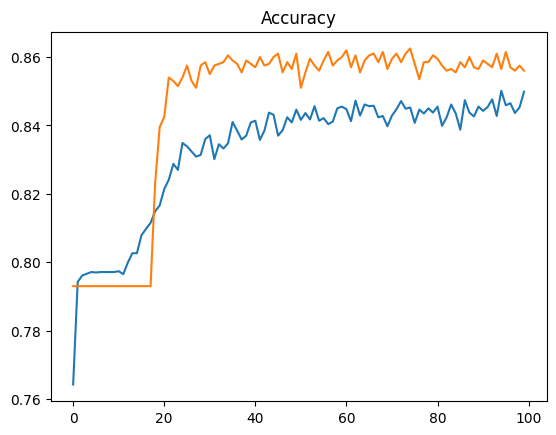

In [40]:
#model performance graph
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validationn accuracy')
plt.title('Accuracy')
plt.show()

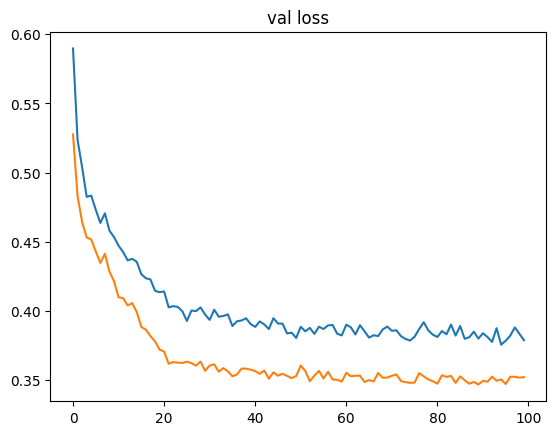

In [41]:
#model performance graph
plt.plot(history.history['loss'], label='val loss')
plt.plot(history.history['val_loss'], label='validationn loss')
plt.title('val loss')
plt.show()

In [42]:
#evaluation on test set
ann.evaluate(xtest,ytest)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 0.8474 - loss: 0.3618


[0.3519740700721741, 0.8560000061988831]

In [43]:
ypred = ann.predict(xtest)
ypred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0.05954113],
       [0.07703034],
       [0.07017567],
       ...,
       [0.1752833 ],
       [0.13430995],
       [0.1705518 ]], dtype=float32)

In [44]:
ypred[0][0]

0.059541132

In [45]:
#Converting continous ypred values to 0,1 coz ann has produced continous values but we want in form of 0/1
yprednew = []
for i in range(len(ypred)):
    if ypred[i][0]>0.5:
        yprednew.append(1)
    else:
        yprednew.append(0)

In [46]:
yprednew

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,


In [47]:
#conver yprednewlist to np.array the reshape to same as ytest so tha we can form confusion matrix and see accuracy
yprednew = np.array(yprednew)
yprednew = yprednew.reshape(len(yprednew), 1)

In [48]:
yprednew.shape

(2000, 1)

In [49]:
yprednew

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [50]:
#model eval
from sklearn.metrics import classification_report
print(classification_report(ytest, yprednew))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1586
           1       0.79      0.42      0.55       414

    accuracy                           0.86      2000
   macro avg       0.83      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000



In [52]:
#model eval through confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(ytest, yprednew)
print(cm)
print(accuracy_score(ytest, yprednew))

[[1539   47]
 [ 241  173]]
0.856
